<a href="https://colab.research.google.com/github/abhi19992/ann-tensorflow-deeplearning/blob/main/ANN_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the packag

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Part 2 - Now let's make the ANN!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# Adding the input layer and the first hidden layer


In [ ]:
classifier.add(Dense(units=11,activation = 'relu'))

In [ ]:
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics='accuracy')

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 7)                 84        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_10 (Dense)            (None, 6)                 48        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable 

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size=10,epochs=500,callbacks=es)

Epoch 1/500
536/536 [==============================] - 3s 5ms/step - loss: 0.4856 - accuracy: 0.7919 - val_loss: 0.4252 - val_accuracy: 0.7970
Epoch 2/500
536/536 [==============================] - 2s 4ms/step - loss: 0.4288 - accuracy: 0.8087 - val_loss: 0.3968 - val_accuracy: 0.8353
Epoch 3/500
536/536 [==============================] - 2s 4ms/step - loss: 0.4022 - accuracy: 0.8242 - val_loss: 0.3876 - val_accuracy: 0.8440
Epoch 4/500
536/536 [==============================] - 2s 4ms/step - loss: 0.3959 - accuracy: 0.8278 - val_loss: 0.3776 - val_accuracy: 0.8455
Epoch 5/500
536/536 [==============================] - 2s 4ms/step - loss: 0.3960 - accuracy: 0.8281 - val_loss: 0.3746 - val_accuracy: 0.8470
Epoch 6/500
536/536 [==============================] - 2s 4ms/step - loss: 0.3917 - accuracy: 0.8294 - val_loss: 0.3741 - val_accuracy: 0.8432
Epoch 7/500
536/536 [==============================] - 2s 4ms/step - loss: 0.3857 - accuracy: 0.8300 - val_loss: 0.3723 - val_accuracy: 0.8459

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


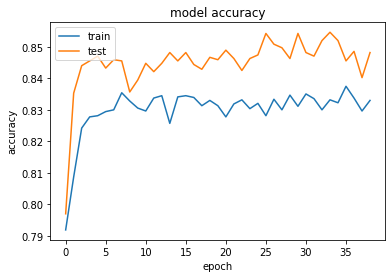

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

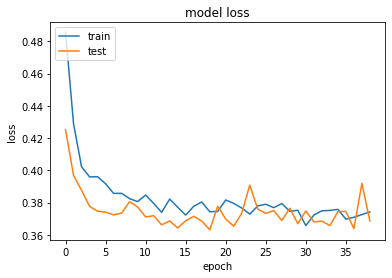

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1555,   40],
       [ 236,  169]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.862